## __Project Title:__ Data Analytics & Visalization Techniques using the Titanic dtaset, pizza delivery datasets, and gym membership exercise dataset from Kaggle

### __Libraries Used:__ Pandas, Seaborn, Numpy, Matplotlib

#### __Titanic Dataset Goals:__ Practice data inspection, data cleaning, and visualization techniques 
* Key Steps:
    * Load CSV into Pandas DataFrame
    * Used info(), describe(), isnull().sum() , and unique to assess column types, missing values, and distribution
    * Cleaned missing data found in cabin, age, and embarked columns
        * Used .median() and .mod() to preserve distribution integrity and categorical logic
        * Replaced missing cabin data with 'Unknown' to retain row structure for downstream analysis
        * Reinforced best practices learned in the Data Science & Engineering graduate course on handling nulls before visualization or modeling
    * Explored survival patterns in the data using bar chart visualizations
        * Bar charts are often dismissed as simplistic due to their ubiquity, but that's precisely why they're powerful. Their familarity reduces cognitive load, allowing audiences to focus on the message rather than deciphering the format. I chose bar charts to practice visual storytelling in a format taht's accessible, intuitive, and effective - enabling quick comparisons across categories and highlighting incremental differences with clarity.  


#### __Pizza and Gym Dataset Goals:__ Practice data exploration & visalization techniques 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np

#### The Titanic dataset
source: https://www.kaggle.com/c/titanic/data

In [4]:
#create titanic dataframe from csv file and inspect the data
titanic = pd.read_csv("titanictrain.csv")


#inspect data
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#inspect data with display

display(titanic.head(10))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
#explore data
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
#find null data in all columns: cabin, age, and embarked columns all contain nulls 

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
#explore cabin data further to assess why it is almost all nulls
titanic.Cabin.unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [15]:
#copy data that I want to explore further into a new dataframe without changing the original dataframe
cabin = titanic[['PassengerId','Survived','Pclass','Sex','Age','Cabin']].copy()

#add new column which classifies each record as either having a 'value' or 'no value' in the cabin column using numpy where

cabin['CabinValueClassifier'] = np.where(cabin['Cabin'].notnull(), 'value','no value')

display(cabin)

,PassengerId,Survived,Pclass,Sex,Age,Cabin,CabinValueClassifier
0,1,0,3,male,22.0,NaN,no value
1,2,1,1,female,38.0,C85,value
2,3,1,3,female,26.0,NaN,no value
3,4,1,1,female,35.0,C123,value
4,5,0,3,male,35.0,NaN,no value
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,NaN,no value
887,888,1,1,female,19.0,B42,value
888,889,0,3,female,NaN,NaN,no value
889,890,1,1,male,26.0,C148,value


In [17]:
#explore the relationship betwen Pclass and cabin value using group by

cabinpclass = cabin.groupby(['Pclass','CabinValueClassifier']).agg(Cabin_Value =('CabinValueClassifier','count')).reset_index()

display(cabinpclass)

,Pclass,CabinValueClassifier,Cabin_Value
0,1,no value,40
1,1,value,176
2,2,no value,168
3,2,value,16
4,3,no value,479
5,3,value,12


As I suspected, the majority of cabin values which are missing are associated with passengers who in Pclasses 2 and 3 which were the middle
and lower classes, respectfully. 

In [20]:
#clean missing data in Age,Embarked, and Cabin

titanic["Age"]=titanic["Age"].fillna(titanic["Age"].median())  # Fill with median age
titanic["Embarked"]=titanic["Embarked"].fillna(titanic["Embarked"].mode()[0])  # Fill with most common value
titanic["Cabin"]=titanic["Cabin"].fillna("Unknown")  # Replace missing Cabin data

In [22]:
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Unknown,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Unknown,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Unknown,S


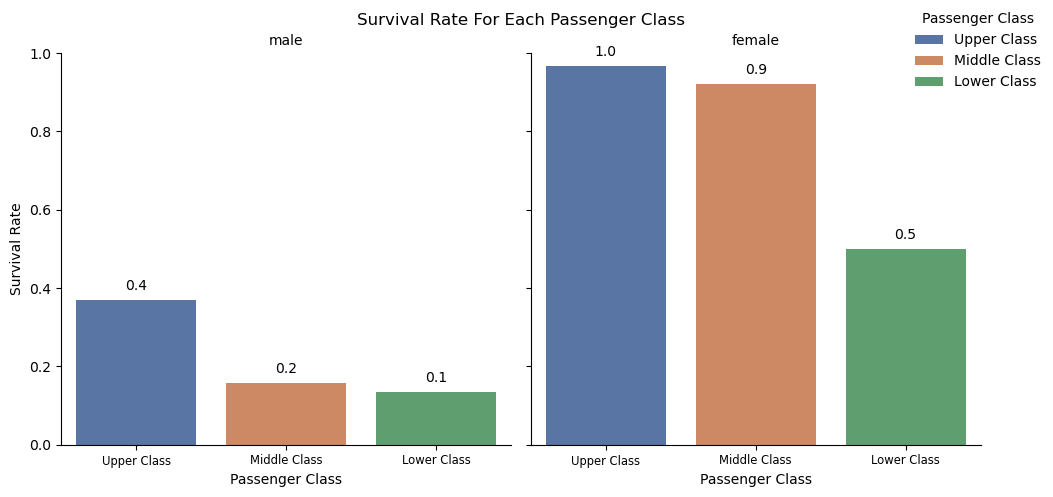

In [24]:
#visualize survival rate based on passenger class and gender

classes = ['Upper Class', 'Middle Class', 'Lower Class']
ax = sns.catplot(x="Pclass",y="Survived",hue="Pclass", palette="deep",col='Sex',kind='bar',
                 errorbar=None,data=titanic)

#annotate each bar with their resepective value
for g in ax.axes.flat: 
    for p in g.patches:
        height = p.get_height()
        if height > 0:
            g.annotate(f'{height:.1f}',
                   (p.get_x() + p.get_width()/2.,height),
                   ha='center',va='bottom',fontsize=10,
            color='black',xytext=(0,5),textcoords='offset points')
            
#format legend
legend = ax._legend
legend.set_title("Passenger Class")
legend._loc=1
for text, label in zip(legend.get_texts(),classes):
    text.set_text(label)
    
#format title and axis labels/ticks    
ax.fig.suptitle("Survival Rate For Each Passenger Class", fontsize=12)
ax.fig.subplots_adjust(top=.9)
ax.set_titles("{col_name}")
ax.set_axis_labels('Passenger Class','Survival Rate')
ax.set_xticklabels(classes,fontsize='small')
ax.set(ylim=(0,1))
plt.show()

Seaborn’s catplot is a powerful tool for visualizing relationships between categorical and numerical variables. In this analysis, I used it to examine survival rates across gender and passenger class in the Titanic dataset.

The visualization reveals a clear pattern: survival was strongly influenced by both gender and class. Female passengers in the upper and middle classes had exceptionally high survival rates—between 90% and 100%. In contrast, women in the lower class faced significantly reduced odds, with survival dropping to around 50%.

Male passengers experienced far lower survival rates across all classes. Those in the lower and middle classes had survival rates between 10% and 20%, while even upper-class men only reached a 40% chance of survival. Notably, women in the lower class still had a higher survival rate than men in the upper class, underscoring the impact of gender on survival outcomes.

This analysis highlights how visual storytelling can surface nuanced patterns in historical data.

### Exploring and Visualizing the Pizza Sales Data and Gym Members Exercise Datasets

* Pizza Dataset: https://www.kaggle.com/datasets/akshaygaikwad448/pizza-delivery-data-with-enhanced-features/data
* Gym Members Exercise Data: https://www.kaggle.com/datasets/valakhorasani/gym-members-exercise-dataset

In [28]:
#load & explore pizza and gym datasets

pizza = pd.read_excel("Enhanced_pizza_sell_data_2024-25.xlsx")

gym = pd.read_csv("gym_members_exercise_tracking.csv")

pizza.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Order ID                      1004 non-null   object        
 1   Restaurant Name               1004 non-null   object        
 2   Location                      1004 non-null   object        
 3   Order Time                    1004 non-null   datetime64[ns]
 4   Delivery Time                 1004 non-null   datetime64[ns]
 5   Delivery Duration (min)       1004 non-null   int64         
 6   Pizza Size                    1004 non-null   object        
 7   Pizza Type                    1004 non-null   object        
 8   Toppings Count                1004 non-null   int64         
 9   Distance (km)                 1004 non-null   float64       
 10  Traffic Level                 1004 non-null   object        
 11  Payment Method                

In [29]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 973 entries, 0 to 972
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            973 non-null    int64  
 1   Gender                         973 non-null    object 
 2   Weight (kg)                    973 non-null    float64
 3   Height (m)                     973 non-null    float64
 4   Max_BPM                        973 non-null    int64  
 5   Avg_BPM                        973 non-null    int64  
 6   Resting_BPM                    973 non-null    int64  
 7   Session_Duration (hours)       973 non-null    float64
 8   Calories_Burned                973 non-null    float64
 9   Workout_Type                   973 non-null    object 
 10  Fat_Percentage                 973 non-null    float64
 11  Water_Intake (liters)          973 non-null    float64
 12  Workout_Frequency (days/week)  973 non-null    int

In [32]:
#display all columns in the DataFrames to improve readability during exploration an debugging
pd.set_option('display.max_columns', None)

#inspect the data in the pizza and gym datasets
display(pizza.head(10),gym.head(10))

,Order ID,Restaurant Name,Location,Order Time,Delivery Time,Delivery Duration (min),Pizza Size,Pizza Type,Toppings Count,Distance (km),Traffic Level,Payment Method,Is Peak Hour,Is Weekend,Delivery Efficiency (min/km),Topping Density,Order Month,Payment Category,Estimated Duration (min),Delay (min),Is Delayed,Pizza Complexity,Traffic Impact,Order Hour,Restaurant Avg Time
0,ORD001,Domino's,"New York, NY",2024-01-05 18:30:00,2024-01-05 18:45:00,15,Medium,Veg,3,2.5,Medium,Card,True,False,6.000000,1.200000,January,Online,6.0,9.0,False,6,2,18,30.259434
1,ORD002,Papa John's,"Los Angeles, CA",2024-02-14 20:00:00,2024-02-14 20:25:00,25,Large,Non-Veg,4,5.0,High,Wallet,True,False,5.000000,0.800000,February,Online,12.0,13.0,False,12,3,20,28.186275
2,ORD003,Little Caesars,"Chicago, IL",2024-03-21 12:15:00,2024-03-21 12:35:00,20,Small,Vegan,2,3.0,Low,UPI,False,False,6.666667,0.666667,March,Online,7.2,12.8,False,2,1,12,28.844221
3,ORD004,Pizza Hut,"Miami, FL",2024-04-10 19:45:00,2024-04-10 20:10:00,25,XL,Cheese Burst,5,4.5,Medium,Cash,True,False,5.555556,1.111111,April,Offline,10.8,14.2,False,20,2,19,29.948454
4,ORD005,Marco's Pizza,"Dallas, TX",2024-05-05 13:00:00,2024-05-05 13:20:00,20,Medium,Non-Veg,3,2.0,High,Card,False,True,10.000000,1.500000,May,Online,4.8,15.2,False,6,3,13,30.286458
5,ORD006,Domino's,"New York, NY",2024-01-06 19:00:00,2024-01-06 19:20:00,20,Medium,Non-Veg,3,3.0,High,Card,True,True,6.666667,1.000000,January,Online,7.2,12.8,False,6,3,19,30.259434
6,ORD007,Papa John's,"Los Angeles, CA",2024-01-07 20:15:00,2024-01-07 20:40:00,25,Large,Veg,4,4.5,Medium,UPI,True,True,5.555556,0.888889,January,Online,10.8,14.2,False,12,2,20,28.186275
7,ORD008,Little Caesars,"Chicago, IL",2024-01-08 18:30:00,2024-01-08 18:50:00,20,Small,Vegan,2,2.0,Low,Cash,True,False,10.000000,1.000000,January,Offline,4.8,15.2,False,2,1,18,28.844221
8,ORD009,Pizza Hut,"Miami, FL",2024-01-09 19:45:00,2024-01-09 20:10:00,25,XL,Cheese Burst,5,5.0,High,Wallet,True,False,5.000000,1.000000,January,Online,12.0,13.0,False,20,3,19,29.948454
9,ORD010,Marco's Pizza,"Dallas, TX",2024-01-10 13:00:00,2024-01-10 13:20:00,20,Medium,Non-Veg,3,3.5,Medium,Card,False,False,5.714286,0.857143,January,Online,8.4,11.6,False,6,2,13,30.286458


,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,Fat_Percentage,Water_Intake (liters),Workout_Frequency (days/week),Experience_Level,BMI
0,56,Male,88.3,1.71,180,157,60,1.69,1313.0,Yoga,12.6,3.5,4,3,30.20
1,46,Female,74.9,1.53,179,151,66,1.30,883.0,HIIT,33.9,2.1,4,2,32.00
2,32,Female,68.1,1.66,167,122,54,1.11,677.0,Cardio,33.4,2.3,4,2,24.71
3,25,Male,53.2,1.70,190,164,56,0.59,532.0,Strength,28.8,2.1,3,1,18.41
4,38,Male,46.1,1.79,188,158,68,0.64,556.0,Strength,29.2,2.8,3,1,14.39
5,56,Female,58.0,1.68,168,156,74,1.59,1116.0,HIIT,15.5,2.7,5,3,20.55
6,36,Male,70.3,1.72,174,169,73,1.49,1385.0,Cardio,21.3,2.3,3,2,23.76
7,40,Female,69.7,1.51,189,141,64,1.27,895.0,Cardio,30.6,1.9,3,2,30.57
8,28,Male,121.7,1.94,185,127,52,1.03,719.0,Strength,28.9,2.6,4,2,32.34
9,28,Male,101.8,1.84,169,136,64,1.08,808.0,Cardio,29.7,2.7,3,1,30.07


In [34]:
#exploring the restaurant name as to examine the data quality issues with it. as we can see, we will need to clean
#this column as Marco's Pizza appears twice b/c of how the apostrophe was formatted
pizza['Restaurant Name'].unique()

array(["Domino's", "Papa John's", 'Little Caesars', 'Pizza Hut',
       "Marco's Pizza", 'Marco’s Pizza'], dtype=object)

In [36]:
#cleaning the restaurant column name

pizza['Restaurant Name']=pizza['Restaurant Name'].str.replace("’","'", regex = True)

pizza['Restaurant Name'].unique()

array(["Domino's", "Papa John's", 'Little Caesars', 'Pizza Hut',
       "Marco's Pizza"], dtype=object)

In [38]:
#Restaurant Efficiency Analysis by City

restaurantanalysis = pizza.groupby(['Restaurant Name','Location']).agg(NumberofOrders=('Order ID','count'),
                                                                       AvgDeliveryDuration=('Delivery Duration (min)','mean'),
                                                                        AvgDistance=('Distance (km)','mean'),
                                                                         AvgEstDuration=('Estimated Duration (min)','mean'),
                                                                         AvgDelay=('Delay (min)','mean')).reset_index()
                                                                        
                                                                                                                        

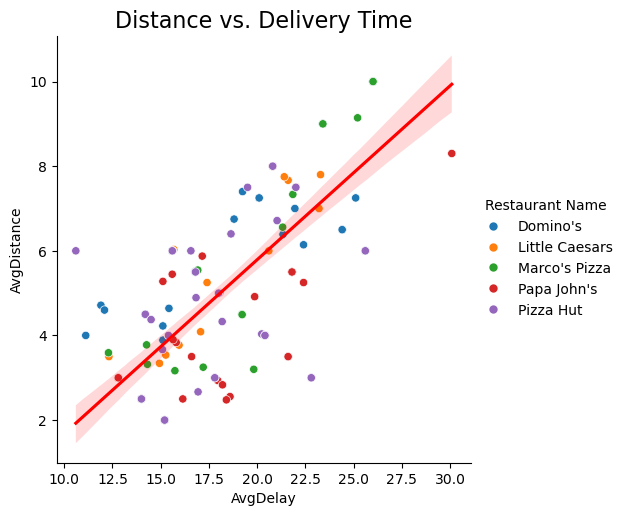

In [42]:
#Scatterplot which explores the relationship between delivery duration and distance on weekends vs. weekdays

sns.relplot(data=restaurantanalysis,x="AvgDelay" ,y="AvgDistance",hue="Restaurant Name")
sns.regplot(data=restaurantanalysis,x="AvgDelay" ,y="AvgDistance",scatter=False, color="red")


plt.title("Distance vs. Delivery Time", fontsize=16)
plt.show()

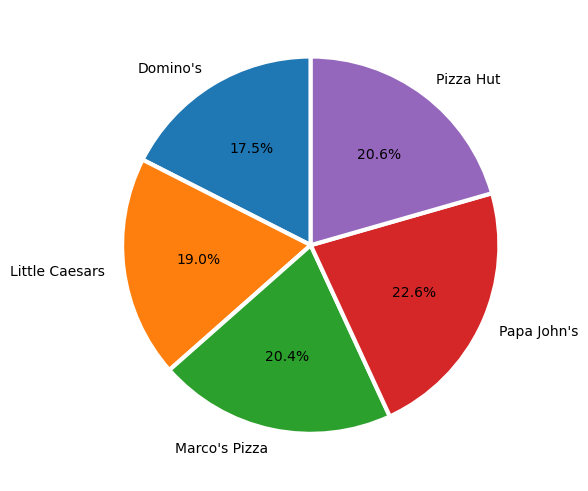

In [44]:
#piechart
#add anotations to the wedges
fig, ax = plt.subplots(layout="constrained")

pizzachain = pizza.groupby('Restaurant Name').agg(delivery_efficiency=('Delivery Efficiency (min/km)','mean')).reset_index()


plt.pie(pizzachain['delivery_efficiency'].round(3),labels=pizzachain['Restaurant Name'], 
        autopct='%1.1f%%', wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
    textprops={'size': 'medium'},startangle=90)

plt.show()

In [46]:
pizzachain

,Restaurant Name,delivery_efficiency
0,Domino's,5.608975
1,Little Caesars,6.084472
2,Marco's Pizza,6.523286
3,Papa John's,7.223012
4,Pizza Hut,6.583230


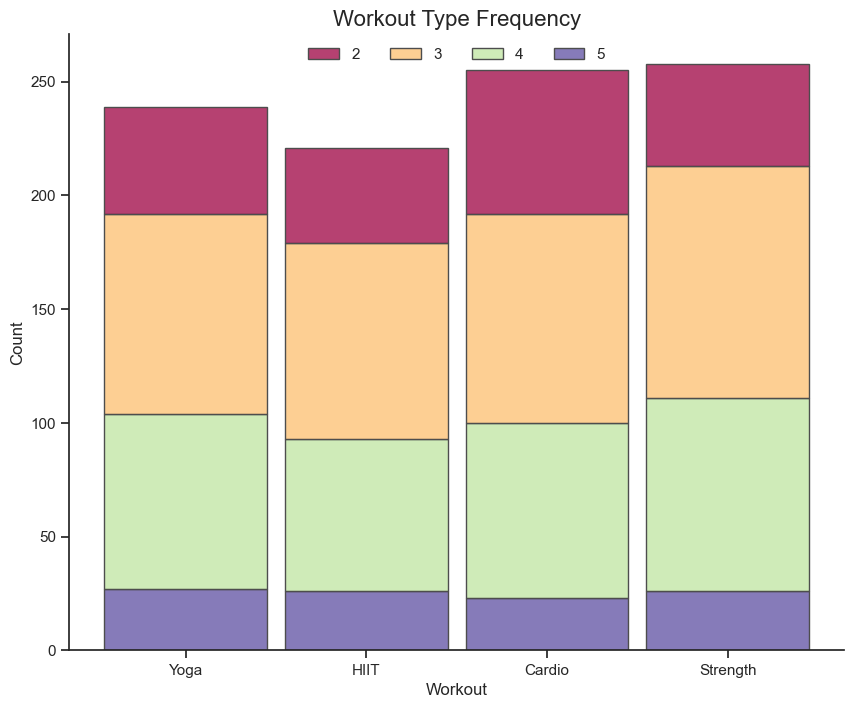

In [48]:
#workout frequency
sns.set_theme(style="ticks")
plt.subplots(figsize=(10, 8))
sns.set_context("notebook")
sns.despine()

#
ax=sns.histplot(gym,x="Workout_Type",hue="Workout_Frequency (days/week)",multiple="stack",palette="Spectral",
             edgecolor="0.3",shrink=.9)

sns.move_legend(
    ax, "upper center",
    bbox_to_anchor=(.5, 1), ncol=4, title=None, frameon=False,)

plt.title("Workout Type Frequency", fontsize=16)
plt.xlabel('Workout')
plt.show()

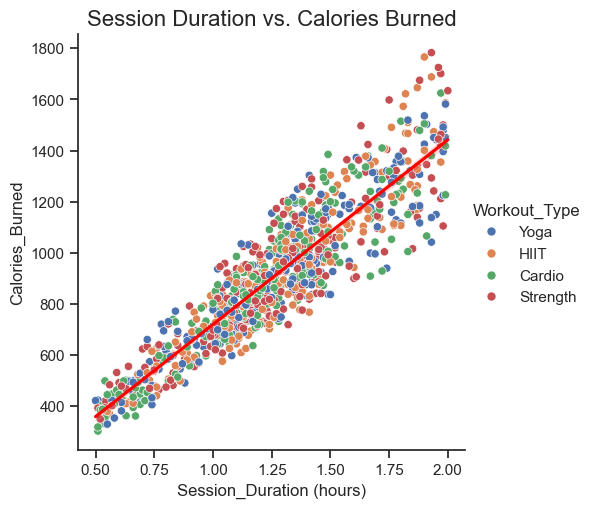

In [50]:
#Scatterplot compares session duration & calories burned with a regression line 
#to cleanly visualize the correlation between session duration & calories burned

sns.relplot(data=gym,x="Session_Duration (hours)" ,y="Calories_Burned",hue="Workout_Type")
sns.regplot(data=gym,x="Session_Duration (hours)" ,y="Calories_Burned",scatter=False, color="red")


plt.title("Session Duration vs. Calories Burned", fontsize=16)
plt.show()

#### __Summary Analysis__
The scatterplot comparing session duration and calories burned revealed that HIIT and Strength workouts tend to yield higher calorie expenditure per hour for longer durations while yoga appears to burn more calories with shorter session durations. While one might immediately conclude that yoga is superior workout type, its important to remember that this visualzation only highlights correlation, not causation. Further analysis would be needed to control for confounding variables such as age, gender, fitness level, and/or workout goals before drawing conclusions about the drivers of calorie expenditure